# NCAA KAGGLE COMPETITION

This is an introduction to Scikit-learn's implementation of the logistic regression.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline
sns.set_context('notebook',font_scale=1.5)

I've done some cleaning on the data to get a running average for the number of points scored per game per team. In the data that is to be loaded in below, there are two matrices. We will call the first one the feature matrix (F) and the second one is the target matrix (T). The feature matrix has two columns. The first is the average number of points that team A scores and the second is the average number of points that team B scores (up to that point in time).

The target matrix has one column. The values take on either 0 (team A won) or 1 (team B won).

In [2]:
data = np.load('ppg_data.npz')
F = data['arr_0']
T = data['arr_1']

For training and testing purposes, we want to split our data into a Training Set and a Testing set. Sklearn has a nice function for that : train_test_split.

In [3]:
from sklearn.cross_validation import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
        F, T, test_size=0.33, random_state=42)

Lets check out a quick visualization, so we have some idea of what our data looks like.

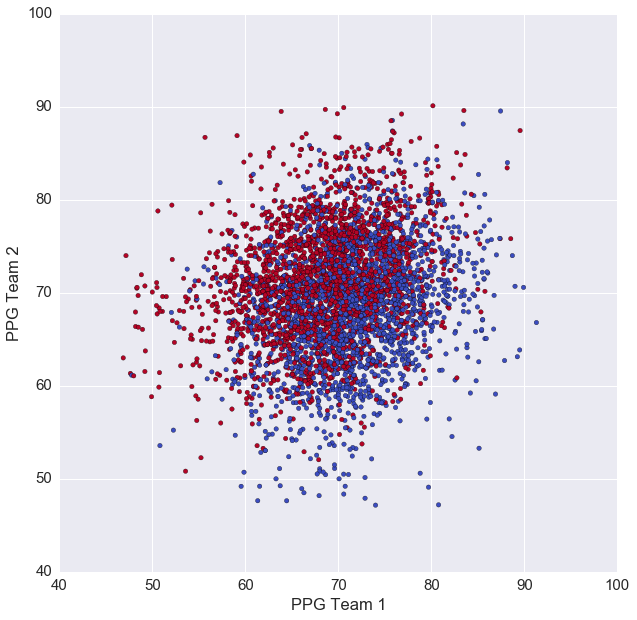

In [5]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm')

ax.set_xlabel('PPG Team 1')
ax.set_ylabel('PPG Team 2')

So we can see there is a little trend in the data, but it is rather noisy. It makes sense that we will definitely have to pull in more features besides the average points per game if we want to be able to make a relatively accurate prediction. Nonetheless, lets fit a logistic regression to this and see how well we are able to do.

In [6]:
from sklearn import linear_model

In [7]:
# create the regression object
logregr = linear_model.LogisticRegression()

# train the model
logregr.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
logregr.score(X_test,y_test)

0.6681674921206664

So we were able to correctly predict a win or loss roughly 67 percent of the time. Not bad for really only using one feature from each team. Obviously if we were to use other features, our predictions would be much better (hopefully).

For this competition the goal was to return probabilities. Sklearn has a very easy method for performing this task, so lets go ahead and visualize it.

Much of the code below is just to visualize our decision boundary. The only bit of code that is used to predict probabilities is:

    ys = logreg.predict_proba(xx_feat)

In [9]:
#for plotting the boundaries
f0_m = np.min(F[:,0])-5
f0_x = np.max(F[:,0])+5
f1_m = np.min(F[:,1])-5
f1_x = np.max(F[:,1])+5

#making a prediction for the entire 2d surface
x1 = np.linspace(f0_m,f0_x,200)
x2 = np.linspace(f0_m,f0_x,200)
xx,yy = np.meshgrid(x1,x2)
xx_feat = np.hstack( (xx.ravel()[:,np.newaxis], yy.ravel()[:,np.newaxis] ))

#get the probabilities for every point in the 2d surface
ys = logregr.predict_proba(xx_feat)

The following is just all plotting. We are going to grab the probability that Team B will. The predict_proba method also returns the probability that team A will win.

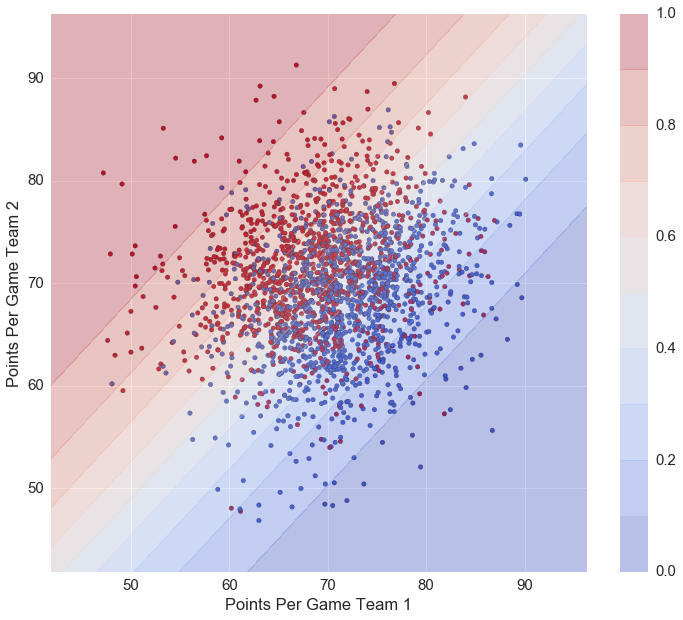

In [10]:
#initialize our axis
fig,ax = plt.subplots(figsize=(12,10))

ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='coolwarm')

v = np.linspace(0,1,11) #contours
im = ax.contourf(xx,yy,ys[:,1].reshape(xx.shape),v,alpha=.3,cmap='coolwarm',vmin=0,vmax=1)

ax.set_xlim((f0_m,f0_x))
ax.set_ylim((f1_m,f1_x))
ax.set_xlabel('Points Per Game Team 1')
ax.set_ylabel('Points Per Game Team 2')
fig.colorbar(im)